In [104]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import os
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
conf = OmegaConf.load('../config.yaml')
dataframes = os.listdir(conf.models.train.dataframes_folder)

In [47]:

sns.set_theme(style="dark")
df = pd.read_csv(conf.models.train.dataframes_folder + dataframes[89])

In [109]:
def cleaning(df):
    df_copy = df[['time','Energy_kwh']]
    df_copy.time = pd.to_datetime(df_copy.time)
    df_copy['month'] = df_copy.time.dt.month
    df_copy['year'] = df_copy.time.dt.year
    df_copy['hour'] = df_copy.time.dt.hour
    df_copy['hour'] = df_copy['hour'].astype('str')
    return df_copy

In [110]:
teste = cleaning(df)

/tmp/ipykernel_240885/1318980628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.time = pd.to_datetime(df_copy.time)
/tmp/ipykernel_240885/1318980628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['month'] = df_copy.time.dt.month
/tmp/ipykernel_240885/1318980628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [111]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        10153 non-null  datetime64[ns]
 1   Energy_kwh  10153 non-null  float64       
 2   month       10153 non-null  int32         
 3   year        10153 non-null  int32         
 4   hour        10153 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(1)
memory usage: 317.4+ KB


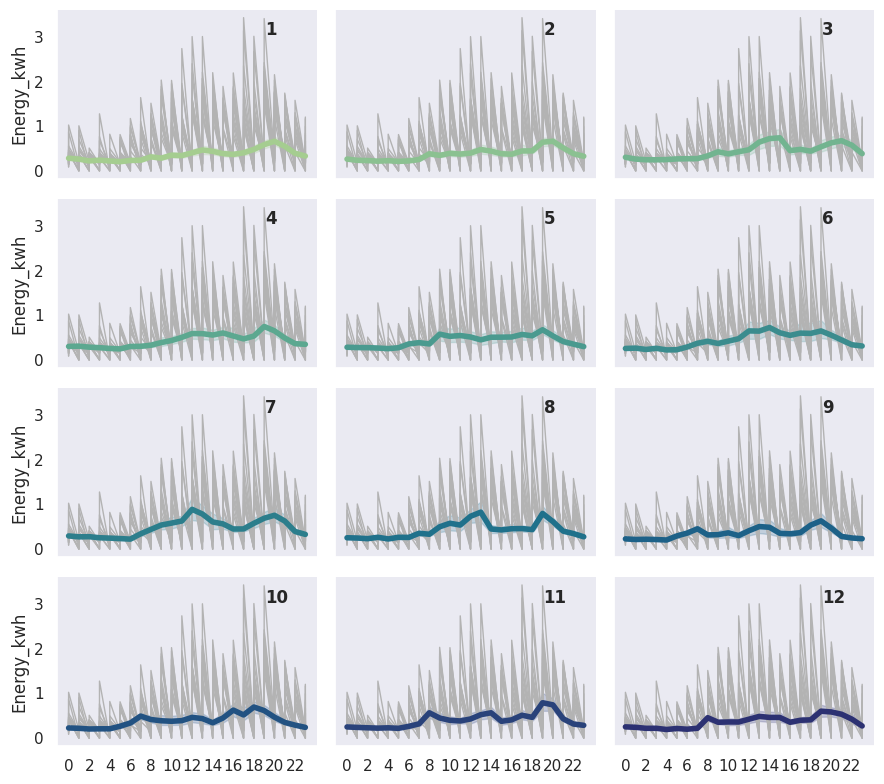

In [51]:
g = sns.relplot(
    data=teste,
    x="hour", y="Energy_kwh", col="month", hue="month",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for month, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, month, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=teste, x="hour", y="Energy_kwh", units="month",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Energy_kwh")
g.tight_layout()

In [115]:
teste[(teste.month == 1) & (teste.year == 2013)]

time  Energy_kwh  month  year hour
0   2013-01-01 00:00:00       0.208      1  2013    0
1   2013-01-01 01:00:00       0.192      1  2013    1
2   2013-01-01 02:00:00       0.231      1  2013    2
3   2013-01-01 03:00:00       0.271      1  2013    3
4   2013-01-01 04:00:00       0.218      1  2013    4
..                  ...         ...    ...   ...  ...
739 2013-01-31 19:00:00       0.949      1  2013   19
740 2013-01-31 20:00:00       0.403      1  2013   20
741 2013-01-31 21:00:00       0.530      1  2013   21
742 2013-01-31 22:00:00       0.476      1  2013   22
743 2013-01-31 23:00:00       0.905      1  2013   23

[744 rows x 5 columns]

<Figure size 2000x800 with 0 Axes>

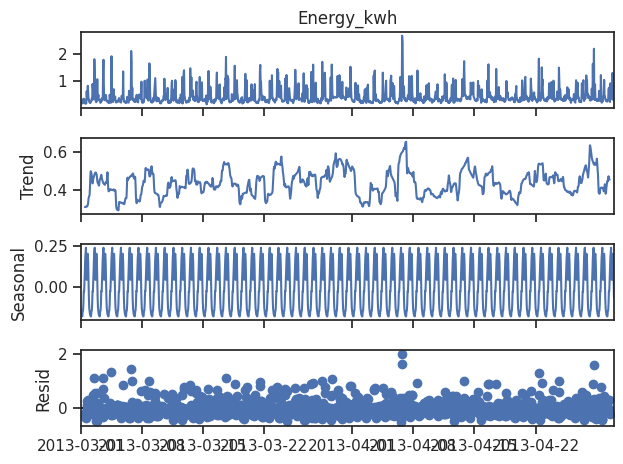

In [121]:
plt.figure(figsize=(20,8))
result = seasonal_decompose(teste[(teste.month.isin([3,4])) & (teste.year == 2013)].set_index('time')['Energy_kwh'])
result.plot()
plt.show()

<Figure size 2000x1600 with 0 Axes>

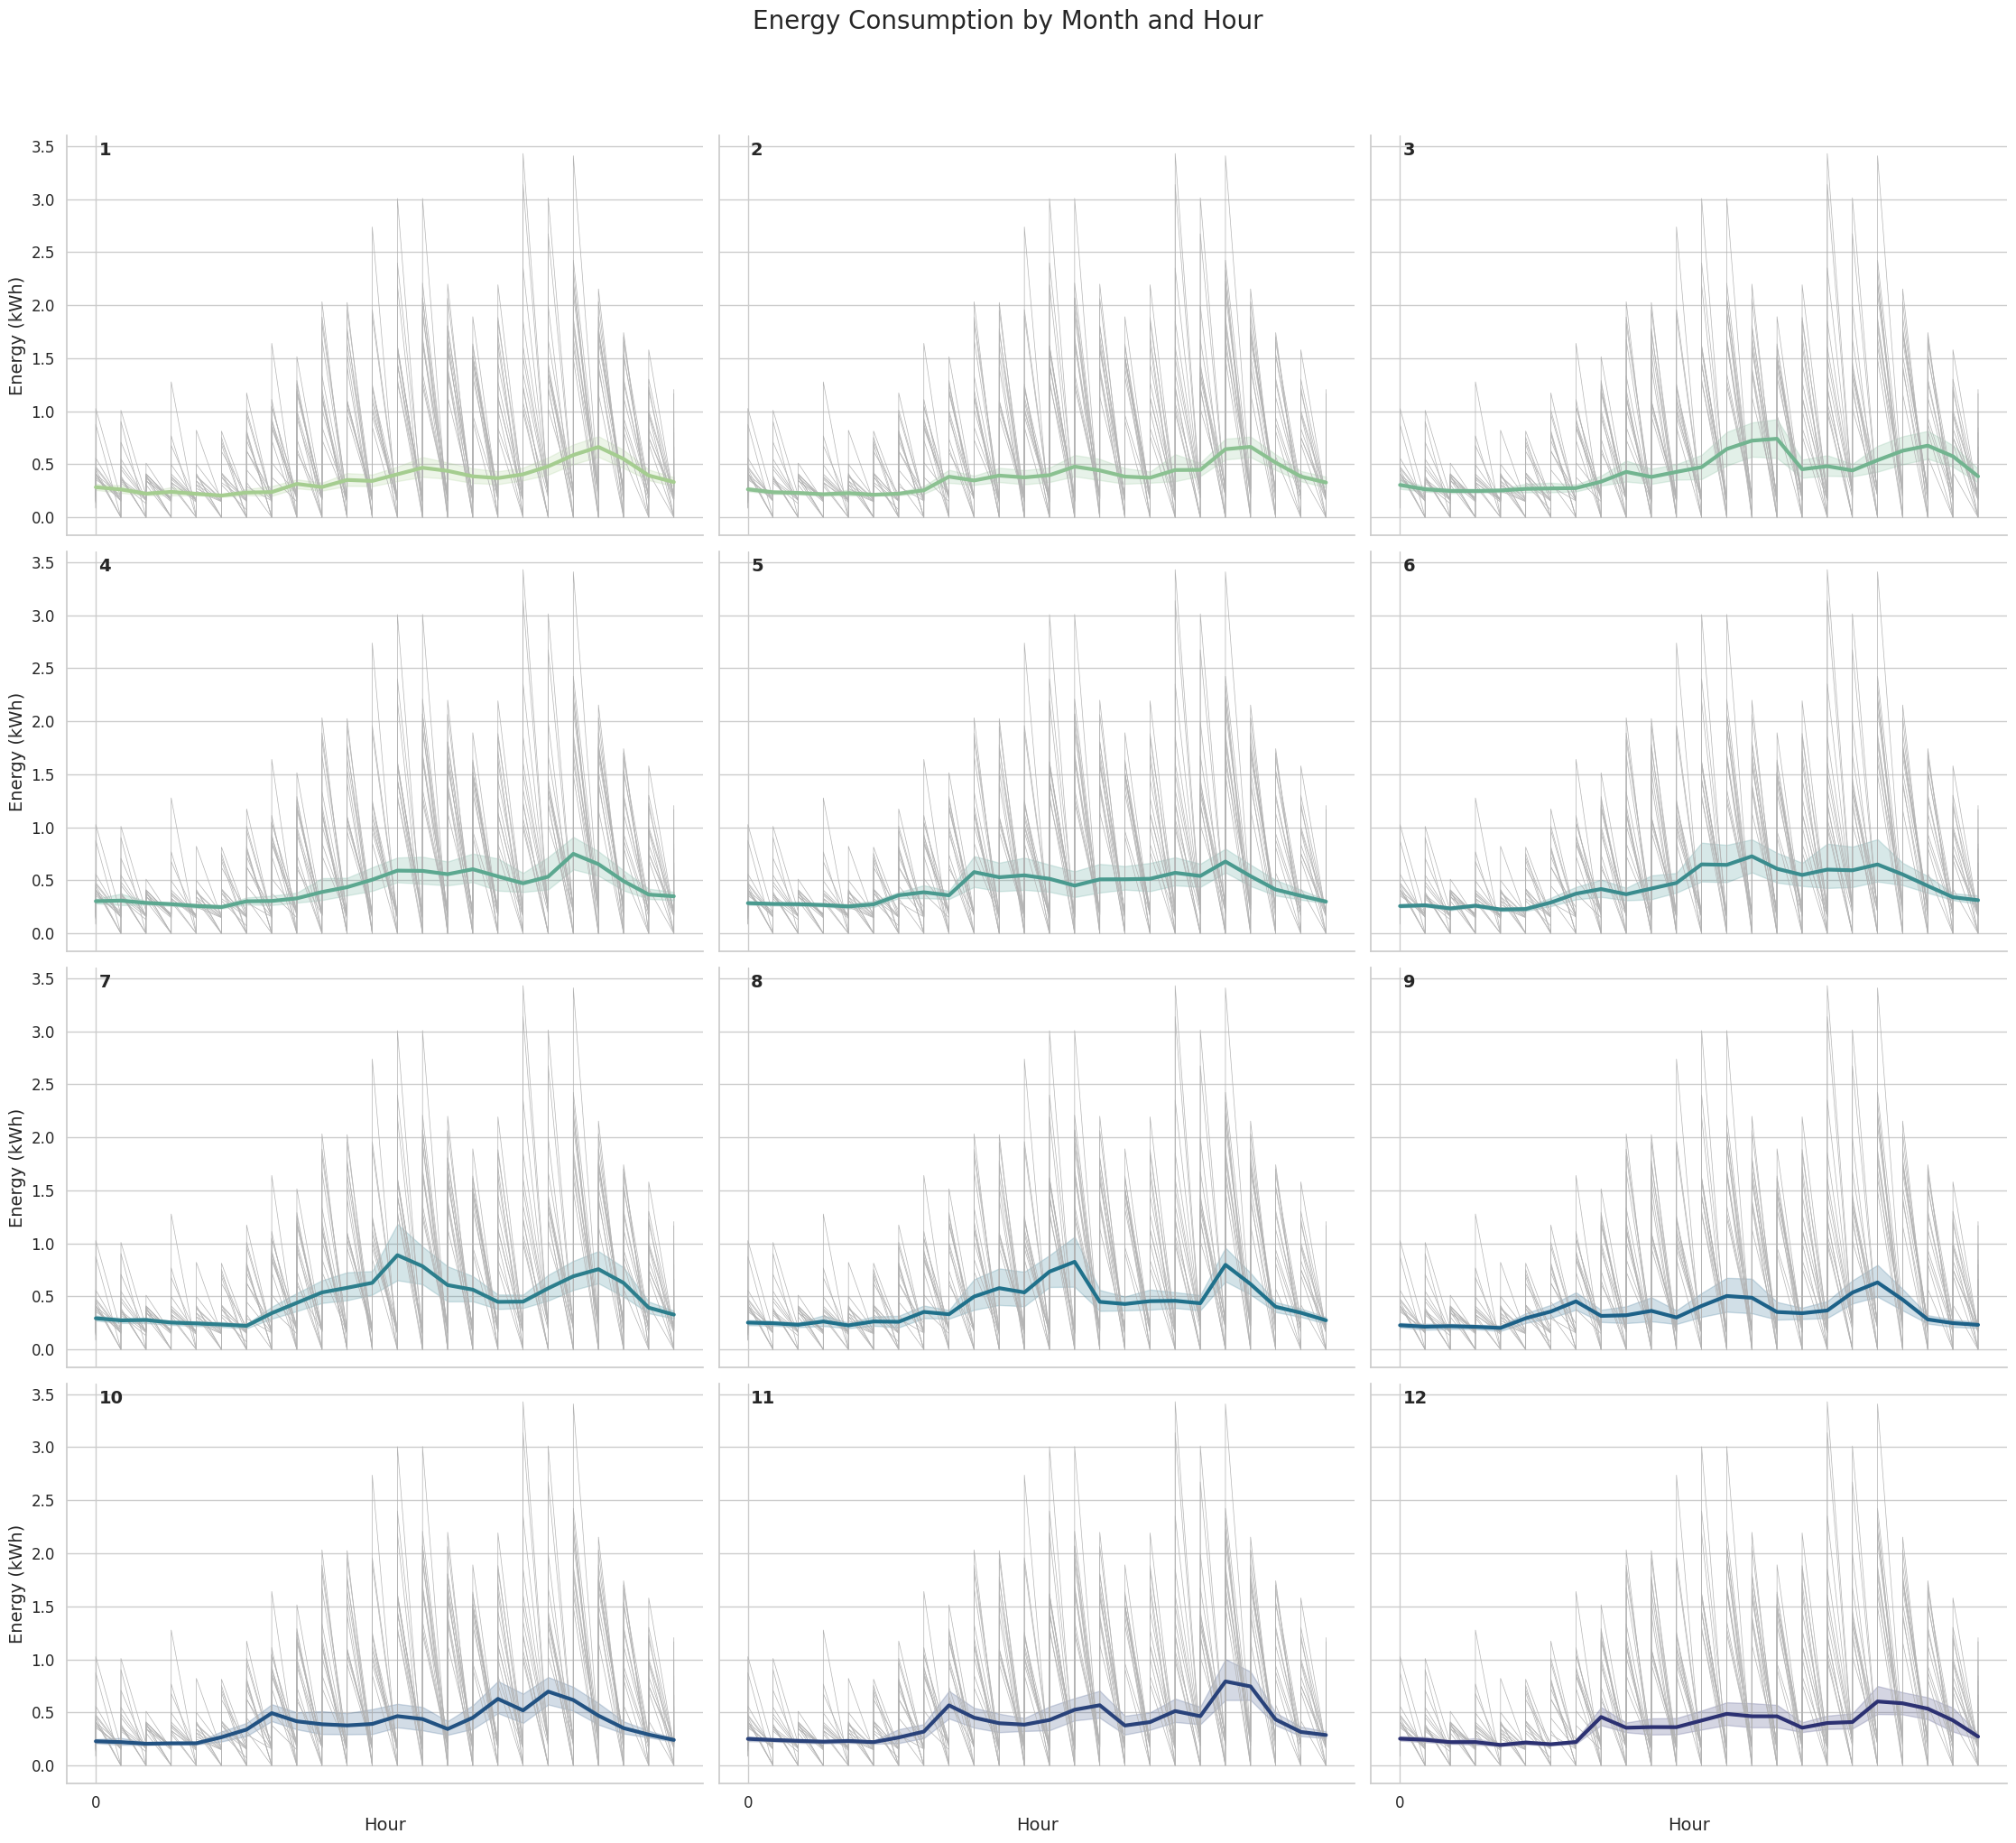

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 16))

# Create the main plot
g = sns.relplot(
    data=teste,
    x="hour", y="Energy_kwh", col="month", hue="month",
    kind="line", palette="crest", linewidth=3, zorder=5,
    col_wrap=3, height=5, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for month, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0.05, 0.95, month, transform=ax.transAxes, fontweight="bold", fontsize=14)
    
    # Plot every year's time series in the background
    sns.lineplot(
        data=teste, x="hour", y="Energy_kwh", units="month",
        estimator=None, color=".7", linewidth=0.5, ax=ax,
    )
    
    # Reduce the frequency of the x axis ticks
    ax.set_xticks(ax.get_xticks()[::2])
    
    # Increase font size of tick labels
    ax.tick_params(axis='both', which='major', labelsize=12)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Hour", "Energy (kWh)", fontsize=14)
g.fig.suptitle("Energy Consumption by Month and Hour", fontsize=20, y=1.02)
g.tight_layout()

# Adjust the layout to prevent clipping of titles
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()


<Figure size 1000x6000 with 0 Axes>

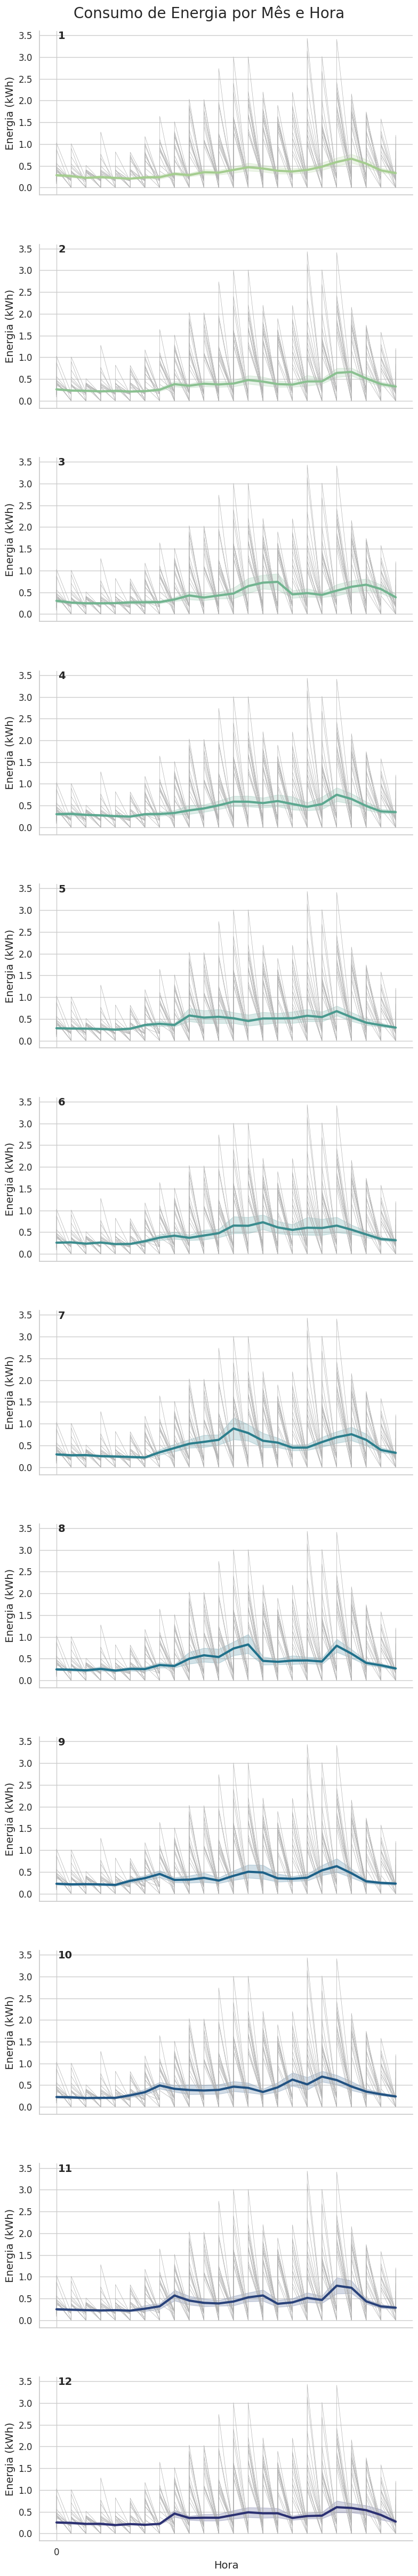

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 60))  # Ajustado para uma coluna longa

# Criar o plot principal
g = sns.relplot(
    data=teste,
    x="hour", y="Energy_kwh", col="month", hue="month",
    kind="line", palette="crest", linewidth=3, zorder=5,
    col_wrap=1,  # Definir como 1 para uma única coluna
    height=4, aspect=2,  # Ajustar a altura e o aspecto de cada subplot
    legend=False,
    facet_kws={'sharey': False, 'sharex': True}  # Permitir escalas y diferentes, mas manter x igual
)

# Iterar sobre cada subplot para personalizar
for month, ax in g.axes_dict.items():
    # Adicionar o título como uma anotação dentro do plot
    ax.text(0.05, 0.95, month, transform=ax.transAxes, fontweight="bold", fontsize=14)
    
    # Plotar as séries temporais de todos os anos no fundo
    sns.lineplot(
        data=teste, x="hour", y="Energy_kwh", units="month",
        estimator=None, color=".7", linewidth=0.5, ax=ax,
    )
    
    # Reduzir a frequência dos ticks do eixo x
    ax.set_xticks(ax.get_xticks()[::2])
    
    # Aumentar o tamanho da fonte dos rótulos dos ticks
    ax.tick_params(axis='both', which='major', labelsize=12)

# Ajustar aspectos de suporte do plot
g.set_titles("")
g.set_axis_labels("Hora", "Energia (kWh)", fontsize=14)
g.fig.suptitle("Consumo de Energia por Mês e Hora", fontsize=20, y=1.005)
g.tight_layout()

# Ajustar o layout para evitar cortes nos títulos
plt.subplots_adjust(top=0.995, hspace=0.3)

# Mostrar o plot
plt.show()

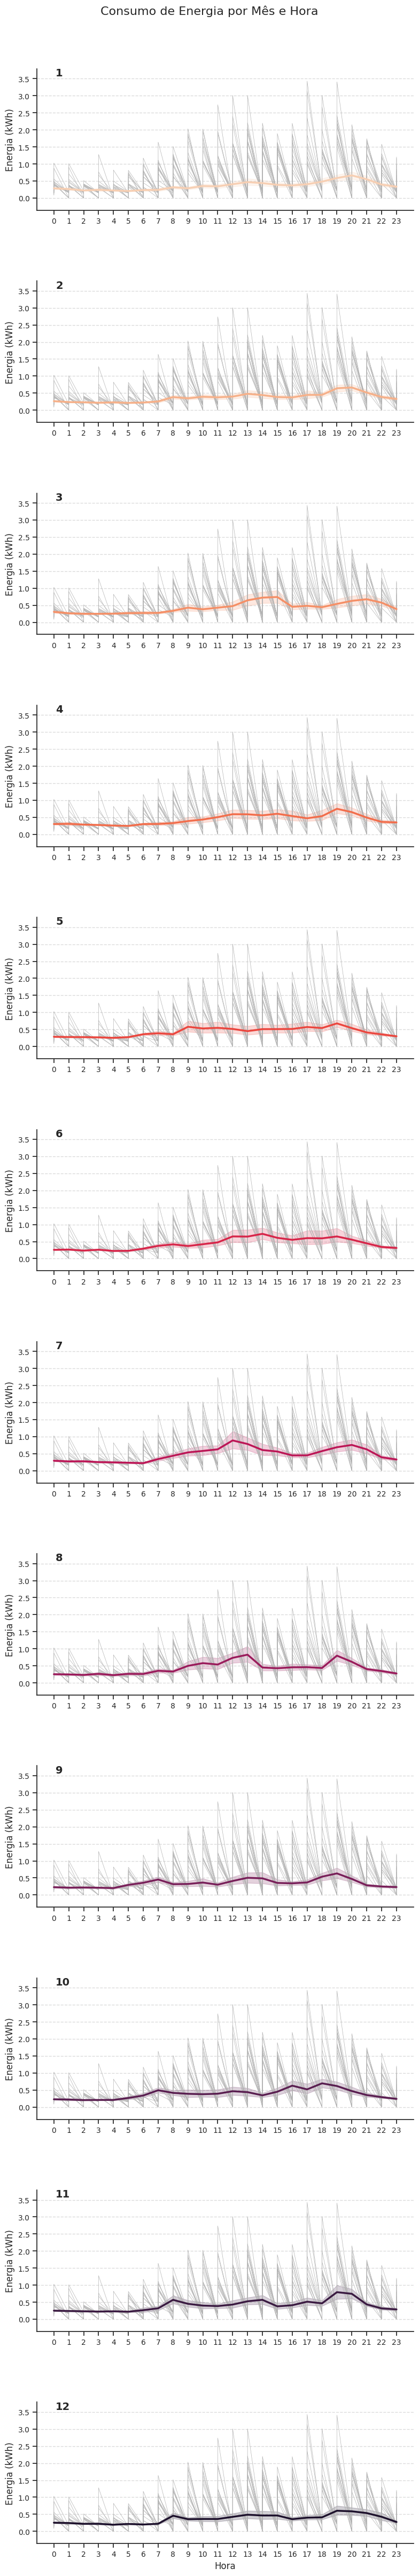

In [62]:
sns.set_theme(style="ticks")

# Definir a paleta de cores
palette = sns.color_palette("rocket_r", n_colors=12)

# Criar o plot principal
g = sns.relplot(
    data=teste,
    x="hour", y="Energy_kwh", col="month", hue="month",
    kind="line", palette=palette, linewidth=2.5, zorder=5,
    col_wrap=1,  # Uma coluna
    height=4, aspect=2,  # Ajustar a altura e o aspecto de cada subplot
    legend=False,
    facet_kws={'sharex': False, 'sharey': False}  # Permitir escalas diferentes para x e y
)

# Iterar sobre cada subplot para personalizar
for i, (month, ax) in enumerate(g.axes_dict.items()):
    # Adicionar o título como uma anotação dentro do plot
    ax.text(0.05, 0.95, month, transform=ax.transAxes, fontweight="bold", fontsize=14)
    
    # Plotar as séries temporais de todos os anos no fundo
    sns.lineplot(
        data=teste, x="hour", y="Energy_kwh", units="month",
        estimator=None, color=".7", linewidth=0.5, ax=ax,
    )
    
    # Configurar os ticks e labels
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Adicionar grid apenas para as linhas horizontais principais
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remover as bordas superior e direita
    sns.despine(ax=ax, top=True, right=True)
    
    # Ajustar os limites do eixo y para cada subplot
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))

# Ajustar aspectos de suporte do plot
g.set_titles("")
g.set_axis_labels("Hora", "Energia (kWh)", fontsize=12)
g.fig.suptitle("Consumo de Energia por Mês e Hora", fontsize=16, y=1.005)

# Ajustar o layout
g.tight_layout()
plt.subplots_adjust(top=0.98, hspace=0.5)

# Mostrar o plot
plt.show()

In [63]:
teste

time  Energy_kwh  month  year hour
0     2013-01-01 00:00:00       0.208      1  2013    0
1     2013-01-01 01:00:00       0.192      1  2013    1
2     2013-01-01 02:00:00       0.231      1  2013    2
3     2013-01-01 03:00:00       0.271      1  2013    3
4     2013-01-01 04:00:00       0.218      1  2013    4
...                   ...         ...    ...   ...  ...
10148 2014-02-27 20:00:00       0.613      2  2014   20
10149 2014-02-27 21:00:00       0.399      2  2014   21
10150 2014-02-27 22:00:00       0.301      2  2014   22
10151 2014-02-27 23:00:00       0.808      2  2014   23
10152 2014-02-28 00:00:00       0.143      2  2014    0

[10153 rows x 5 columns]

In [76]:
teste[teste.year == 2013].time

0      2013-01-01 00:00:00
1      2013-01-01 01:00:00
2      2013-01-01 02:00:00
3      2013-01-01 03:00:00
4      2013-01-01 04:00:00
               ...        
8755   2013-12-31 19:00:00
8756   2013-12-31 20:00:00
8757   2013-12-31 21:00:00
8758   2013-12-31 22:00:00
8759   2013-12-31 23:00:00
Name: time, Length: 8760, dtype: datetime64[ns]

In [134]:
sns.set_theme(style="ticks")



# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=teste[(teste.month == month) & (teste.year == 2013)],
    x="time", y="Energy_kwh",
    #hue="coherence", 
    size="choice", col="align",
    kind="line", 
    #size_order=["T1", "T2"]
    , palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

ValueError: Could not interpret value `choice` for `size`. An entry with this name does not appear in `data`.

AttributeError: Line2D.set() got an unexpected keyword argument 'rot'

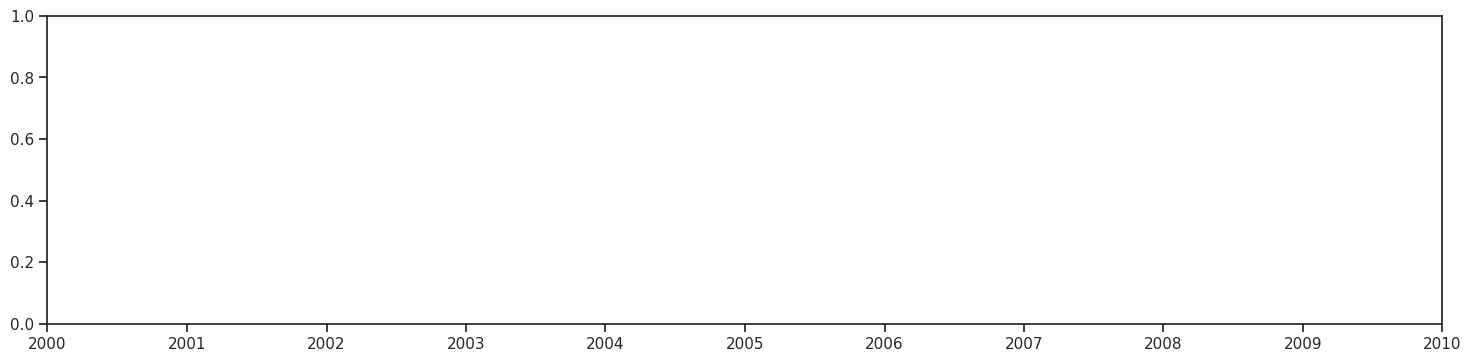

In [127]:

for month in teste.month.unique():
    plt.figure(figsize=(18,4))
    plt.plot(teste[(teste.month == month) & (teste.year == 2013)].time,teste[(teste.month == month) & (teste.year == 2013)].Energy_kwh)
    

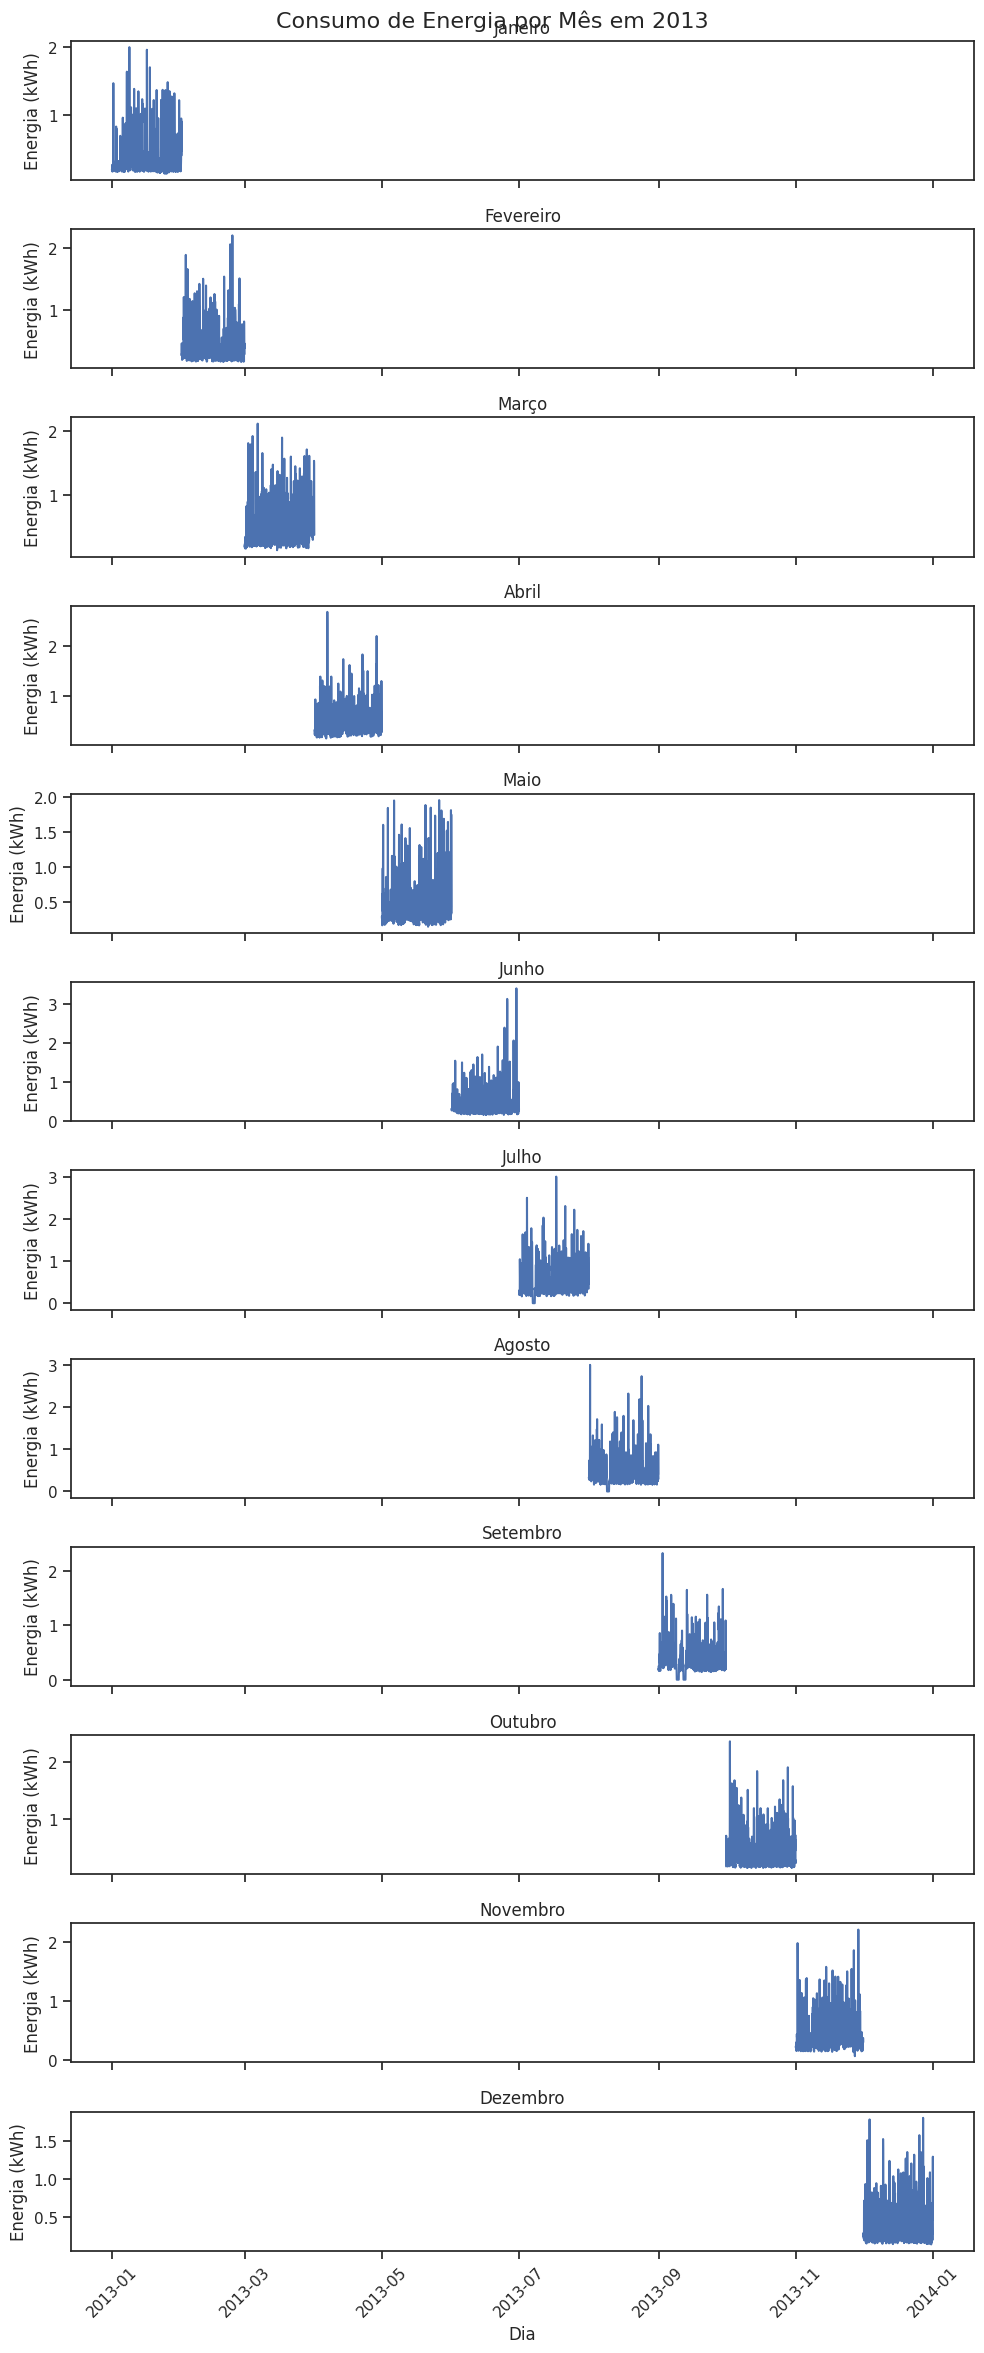


Estatísticas para Janeiro 2013:
count    744.000000
mean       0.368551
std        0.266290
min        0.140000
25%        0.218750
50%        0.272500
75%        0.402250
max        1.994000
Name: Energy_kwh, dtype: float64

Estatísticas para Fevereiro 2013:
count    672.000000
mean       0.373708
std        0.267329
min        0.150000
25%        0.216750
50%        0.280000
75%        0.412250
max        2.208000
Name: Energy_kwh, dtype: float64

Estatísticas para Março 2013:
count    744.000000
mean       0.436183
std        0.314182
min        0.130000
25%        0.251000
50%        0.321000
75%        0.461000
max        2.109000
Name: Energy_kwh, dtype: float64

Estatísticas para Abril 2013:
count    720.000000
mean       0.435269
std        0.295979
min        0.153000
25%        0.271000
50%        0.329500
75%        0.460250
max        2.673000
Name: Energy_kwh, dtype: float64

Estatísticas para Maio 2013:
count    744.000000
mean       0.428575
std        0.299011
min     

In [123]:
fig, axes = plt.subplots(12, 1, figsize=(10, 24), sharex=True)
fig.suptitle('Consumo de Energia por Mês em 2013', fontsize=16)

# Lista de nomes dos meses para os títulos
month_names = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Plotando os dados para cada mês
for i, month in enumerate(range(1, 13)):  # Meses de 1 a 12
    data = teste[(teste.month == month) & (teste.year == 2013)]
    axes[i].plot(data.time, data.Energy_kwh)
    axes[i].set_title(month_names[i])
    axes[i].set_ylabel('Energia (kWh)')
    
    # Formatando o eixo x apenas para o último subplot
    if i == 11:
        axes[i].set_xlabel('Dia')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].tick_params(axis='x', labelbottom=False)

# Ajustando o layout
plt.tight_layout()
plt.show()

# Imprimindo algumas estatísticas básicas
for month in range(1, 13):
    data = teste[(teste.month == month) & (teste.year == 2013)]
    print(f"\nEstatísticas para {month_names[month-1]} 2013:")
    print(data.Energy_kwh.describe())

/tmp/ipykernel_240885/3885443848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['minutes'] = teste['time'].apply(time_to_minutes)


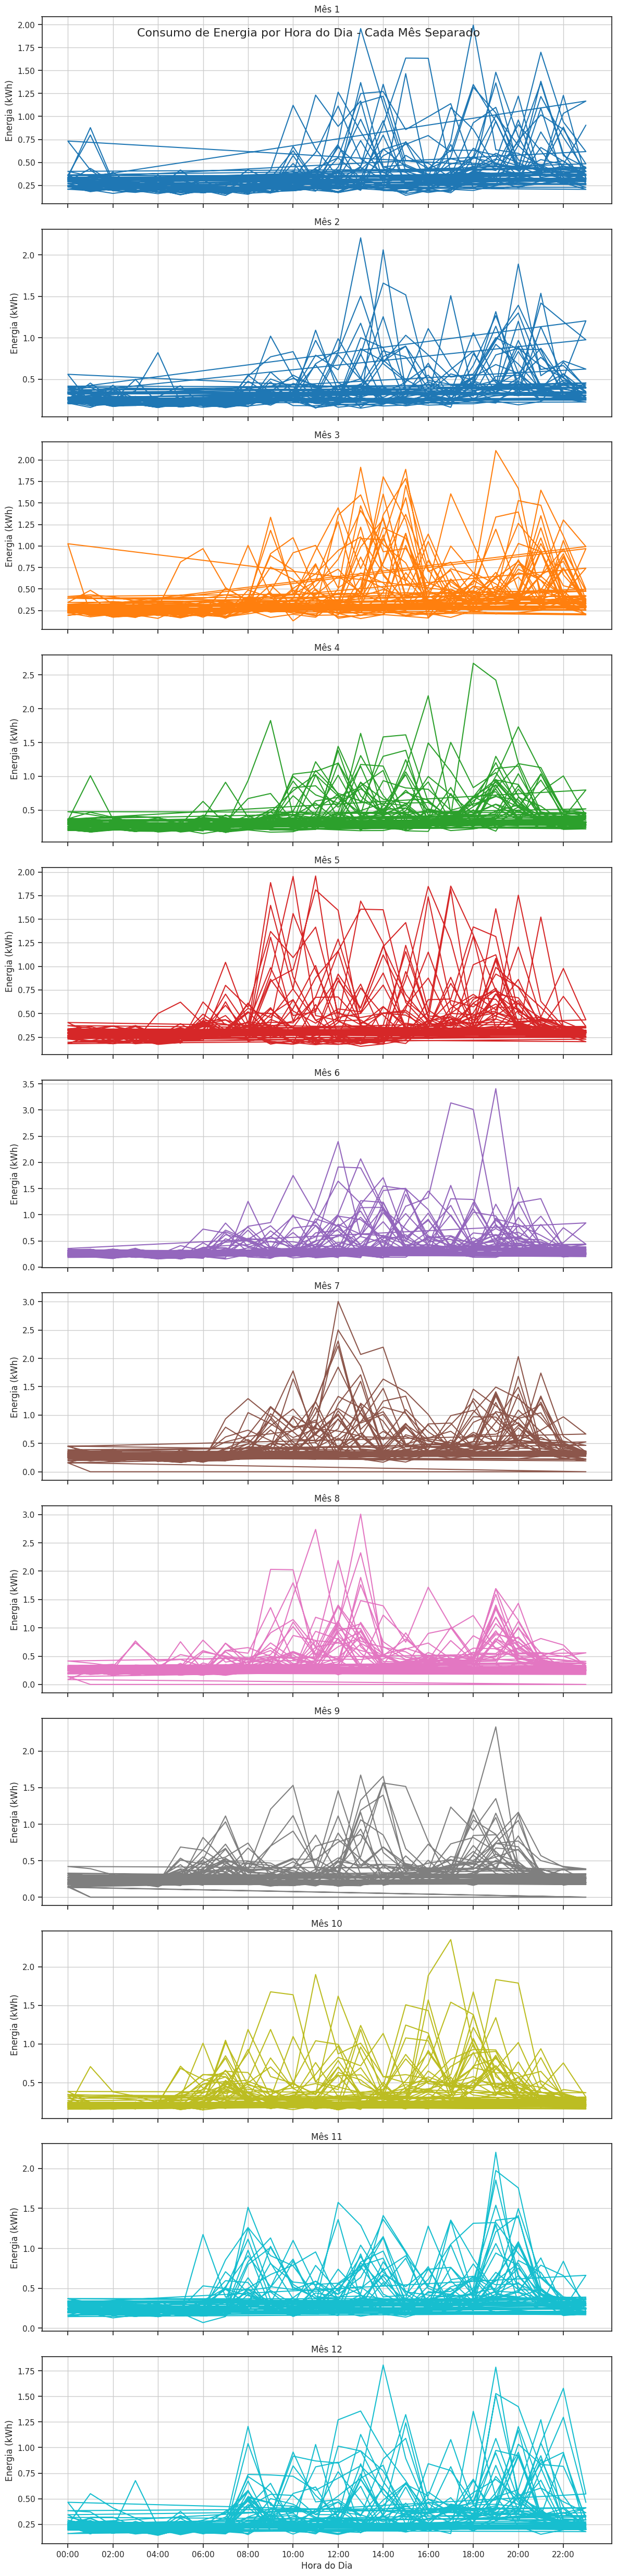

In [92]:
def time_to_minutes(t):
    return t.hour * 60 + t.minute

teste['minutes'] = teste['time'].apply(time_to_minutes)

# Criando a figura com subplots
fig, axs = plt.subplots(12, 1, figsize=(12, 50), sharex=True)
fig.suptitle('Consumo de Energia por Hora do Dia - Cada Mês Separado', fontsize=16)

# Cores para cada mês
colors = plt.cm.tab10(np.linspace(0, 1, 12))

for i, month in enumerate(sorted(teste.month.unique())):
    data = teste[(teste.month == month) & (teste.year == 2013)]
    axs[i].plot(data.minutes, data.Energy_kwh, color=colors[i])
    axs[i].set_ylabel('Energia (kWh)')
    axs[i].set_title(f'Mês {month}')
    axs[i].grid(True)

    # Ajusta o formato do eixo x para mostrar as horas
    axs[i].set_xticks(range(0, 1440, 120))
    axs[i].set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)])

# Ajusta o rótulo do eixo x apenas para o último subplot
axs[-1].set_xlabel('Hora do Dia')

plt.tight_layout()
plt.show()

/tmp/ipykernel_240885/1618499559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_id'] = (data['minutes'] // 1440) + 1  # 1440 minutos em um dia
/tmp/ipykernel_240885/1618499559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_id'] = (data['minutes'] // 1440) + 1  # 1440 minutos em um dia
/tmp/ipykernel_240885/1618499559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

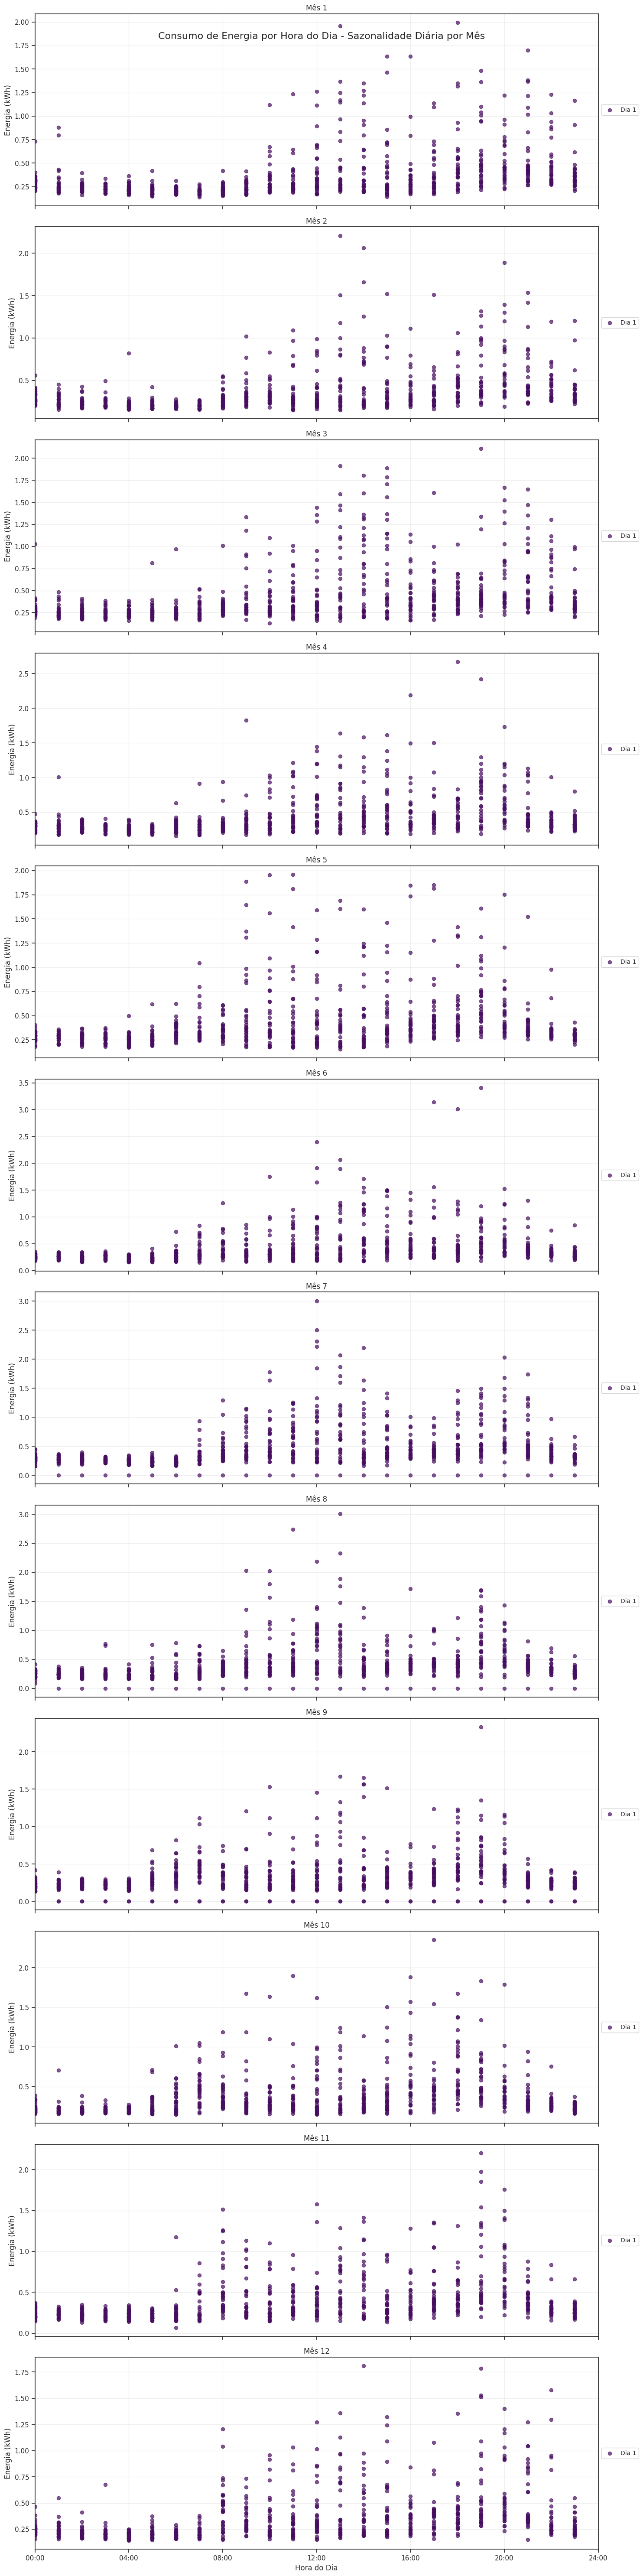

In [102]:
fig, axs = plt.subplots(12, 1, figsize=(15, 60), sharex=True)
fig.suptitle('Consumo de Energia por Hora do Dia - Sazonalidade Diária por Mês', fontsize=16)

# Definindo uma paleta de cores
colors = plt.cm.viridis(np.linspace(0, 1, 31))  # Uma cor para cada dia do mês

for i, month in enumerate(sorted(teste.month.unique())):
    data = teste[(teste.month == month) & (teste.year == 2013)]
    
    # Usar a coluna 'minutes' para identificar dias únicos
    data['day_id'] = (data['minutes'] // 1440) + 1  # 1440 minutos em um dia
    
    # Plotar o consumo de energia para cada dia do mês
    for day in data['day_id'].unique():
        day_data = data[data['day_id'] == day]
        axs[i].scatter(day_data['time_float'], day_data['Energy_kwh'], 
                    color=colors[int(day) % len(colors)], alpha=0.7, linewidth=0.8, 
                    label=f'Dia {day}')
    
    axs[i].set_ylabel('Energia (kWh)')
    axs[i].set_title(f'Mês {month}')
    axs[i].grid(True, alpha=0.3)
    axs[i].set_xlim(0, 24)
    
    # Ajusta o formato do eixo x para mostrar as horas
    axs[i].set_xticks(range(0, 25, 4))
    axs[i].set_xticklabels([f'{h:02d}:00' for h in range(0, 25, 4)])
    
    # Adiciona uma legenda pequena
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Ajusta o rótulo do eixo x apenas para o último subplot
axs[-1].set_xlabel('Hora do Dia')

plt.tight_layout()
plt.show()

In [96]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        10153 non-null  object 
 1   Energy_kwh  10153 non-null  float64
 2   month       10153 non-null  int32  
 3   year        10153 non-null  int32  
 4   hour        10153 non-null  object 
 5   minutes     10153 non-null  int64  
 6   time_float  10153 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 476.0+ KB
